# Instructions


1. Given previous weather forcast data implement a model to predict whether or not it will rain tomorrow. 
2. <b>Evaluate your results. cross-validate your results using CV algorithm of your choice with 10 folds </b> 

## Beat the Baseline of 50% to pass the lab. Anything above 65% gets you a full score.

# About The Dataset


This dataset contains observations of weather metrics for each day from 2008 to 2017. The dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |



In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, f1_score
import sklearn.metrics as metrics

### Importing the Dataset


In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')

df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

### Data Preprocessing


#### Transforming Categorical Variables


First, we need to convert categorical variables to binary variables. We will use pandas `get_dummies()` method for this.


In [4]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [5]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

Check for missing and duplicate values

In [6]:
df_sydney_processed.drop_duplicates(inplace=True)
df_sydney_processed.isna().sum()

Date              0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 68, dtype: int64

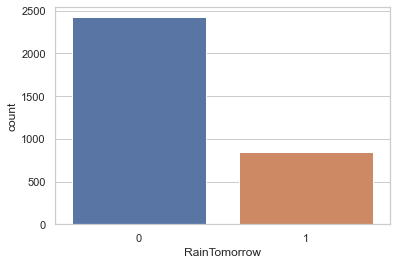

In [7]:
sns.set(style="whitegrid")
sns.countplot(df_sydney_processed.RainTomorrow)
plt.show()

<AxesSubplot:>

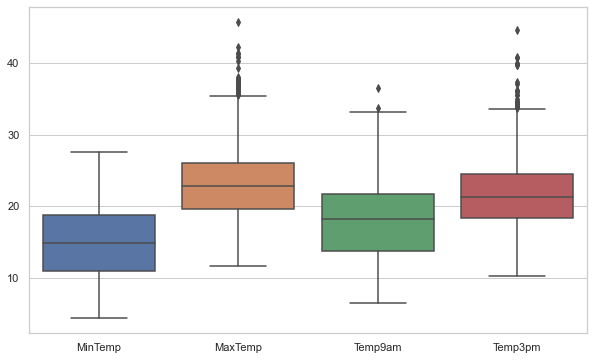

In [8]:
#check for outliers if need be using this code here
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sydney_processed[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [9]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [10]:
df_sydney_processed = df_sydney_processed.astype(float)

In [11]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

# MY PART


#### Q1) Using `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [16]:
# as there ia a class imbalance between categories so, compyting class weight balance

In [13]:
x_train, x_test, y_train, y_test =  train_test_split(features, Y, test_size=0.2, random_state=4)

In [15]:
from sklearn.utils.class_weight import compute_sample_weight
w_train = compute_sample_weight('balanced', y_train)
print(w_train, y_train)

[1.96396396 0.67076923 1.96396396 ... 1.96396396 1.96396396 1.96396396] 630     1.0
935     0.0
1650    1.0
1700    0.0
1753    0.0
       ... 
1921    0.0
709     0.0
2487    1.0
174     1.0
1146    1.0
Name: RainTomorrow, Length: 2616, dtype: float64


#### Create and train your model using the training data (`x_train`, `y_train`).


In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train, sample_weight=w_train)


LogisticRegression()

#### Use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [21]:
y_pred = model.predict(x_test)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.6859903381642513
0.8015267175572519


#### Using the `predictions` and the `y_test` dataframe Evaluate your model and cross validate your results

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, features, Y, cv=10, scoring='accuracy')
#scores
print( scores.mean())

0.8349052733646601


#### Discuss your findings 

we got a binary problem, so logistic regression was best for  such kind of problem. So i used the model of logistic regression and predicted by 
fitting it and got the accuracy of 83% which is even better and higher than the baseline we were provided. 